In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm
import pandas as pd
import shutil
import time
import csv
import os

### Coversione da .txt/.tab a Dataframe
* creo un DataFrame vuoto
* quando raggiungo la riga dei nomi delle colonne riporto gli stessi nomi per le colonne del DataFrame
* aggiungo ogni riga trovata al dataframe

In [21]:
#--- FUNZIONE PER CONVERTIRE UNA TABELLA IN DATAFRAME

def tab_to_df(filename):
    file1 = open(filename, "rb")
    df = pd.DataFrame()
    flag_data = 0
    
    #pbar = tqdm(file1, desc=filename)
    for line in tqdm(file1):

        if b'\xb0C' in line:     # se trovo il carattere °C lo ignoro
            pass
        else:
            line = line.decode() # altrimenti decodifico la riga

            # cerco la riga con i nomi della tabella
            if line.startswith('NR'):
                flag_data = 1                  # quando trovo i nomi delle colonne imposto flag_data = 1
                table_names = line.split()     # divido i nomi delle colonne      
                table_names.remove('LastLine') # elimino 'LastLine' che fa riferimento ad un singolo dato duplicato
                
                # definisco i nomi delle colonne del dataframe
                df = df.reindex(columns = table_names)

            # Se sono arrivato alla tabella ma la riga inizia con 0 la salto
            elif flag_data == 1 and line.startswith('0'):
                pass

            # Se sono arrivato alla tabella (flag_data == 1) e non sono alla prima riga
            # inizio a salvare i dati
            elif flag_data == 1:
                row = line.split()

                if not line.startswith('[END]') and len(row) == len(table_names)+1: # le righe con meno di 25 elementi hanno dati mancanti
                    row[-2] = str(row[-2]) + ' ' + str(row[-1]) # unisco l'ora col giorno
                    del row[-1] # elimino la colonna con i giorni
                    
                    df_length = len(df)
                    df.loc[df_length] = row
    
    #df['DataTime'] = pd.to_datetime(df['DataTime'], format='%H:%M:%S %d.%m.%y', errors='coerce')
    df.set_index('DataTime', drop = True, inplace=True)
    df.index = pd.to_datetime(df.index, format='%H:%M:%S %d.%m.%Y')
    df.drop('NR', axis=1, inplace=True)
    
    for column in df.keys():
        if 'PLC_' in column or column == 'OpMode':
            df.drop(column, axis=1, inplace=True)
        else:
            df[column] = df[column].apply(pd.to_numeric)
    
    # controllo se ci sono colonne nulle e le elimino
    for column in df:
        if (df[column] == 0).all():
            df.drop(column, axis=1, inplace=True)
    
    df.sort_index(inplace = True)
            
    return df
                        
#--- MAIN

data = tab_to_df('table/Diag_temp.tab')
#data = data.resample('5T').mean()
data.head(10)

14600it [03:39, 66.37it/s]


,t_TTlubr,t_TT_ab1,t_TT_ab2,t_Sfrnt1,t_Sfrnt2,t_Srear,t_Smotor,S_Speed,S_Load,tCo_H_Y1,tCo_H_Z1,tCo_H_Y2
DataTime,,,,,,,,,,,,
2021-07-11 08:25:01,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0,0,0.0042,0.0265,0.0077
2021-07-11 08:26:01,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0,0,0.0042,0.0265,0.0077
2021-07-11 08:27:01,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0,0,0.0042,0.0265,0.0077
2021-07-11 08:28:01,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0,0,0.0042,0.0265,0.0077
2021-07-11 08:29:01,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0,0,0.0042,0.0265,0.0077
2021-07-11 08:30:01,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0,0,0.0042,0.0265,0.0077
2021-07-11 08:31:01,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0,0,0.0042,0.0265,0.0077
2021-07-11 08:32:01,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0,0,0.0042,0.0265,0.0077
2021-07-11 08:33:01,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0,0,0.0042,0.0265,0.0077


In [24]:
data2 = data.resample('1T').mean()
data2.head(10)

,t_TTlubr,t_TT_ab1,t_TT_ab2,t_Sfrnt1,t_Sfrnt2,t_Srear,t_Smotor,S_Speed,S_Load,tCo_H_Y1,tCo_H_Z1,tCo_H_Y2
DataTime,,,,,,,,,,,,
2021-07-11 08:25:00,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0.0,0.0,0.0042,0.0265,0.0077
2021-07-11 08:26:00,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0.0,0.0,0.0042,0.0265,0.0077
2021-07-11 08:27:00,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0.0,0.0,0.0042,0.0265,0.0077
2021-07-11 08:28:00,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0.0,0.0,0.0042,0.0265,0.0077
2021-07-11 08:29:00,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0.0,0.0,0.0042,0.0265,0.0077
2021-07-11 08:30:00,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0.0,0.0,0.0042,0.0265,0.0077
2021-07-11 08:31:00,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0.0,0.0,0.0042,0.0265,0.0077
2021-07-11 08:32:00,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0.0,0.0,0.0042,0.0265,0.0077
2021-07-11 08:33:00,19.2,19.1,19.3,21.2,21.1,21.2,23.0,0.0,0.0,0.0042,0.0265,0.0077


## Script di conversione
Converto le tabelle creando una cartella con tutti i file convertiti. Se la cartella esiste già la sovrascrivo. I file creati vengono salvati in memoria in un dizinario.

In [26]:
path = 'table/'
path_dest = path + 'csv/'
dataDict = {}

# controllo se la cartella 'csv' è presente. Se c'è la elimino e la ricreo, se non c'è la creo.
if os.path.isdir(path_dest):
    shutil.rmtree(path_dest)
    os.mkdir(path_dest)
else:
    os.mkdir(path_dest)

for filename in os.listdir(path):
    if (filename.endswith('.txt') or filename.endswith('.tab')): 
        df = tab_to_df(path + filename)
        if len(df) > 5:
            #df = df.resample('10T').mean()
            df.sort_index(inplace = True)
            dataDict[filename] = df
            df.to_csv(path_dest+filename, index=True)

for i in dataDict:
    print(i)

202it [00:00, 18816.47it/s]
217it [00:00, 9182.63it/s]
1446it [00:11, 125.87it/s]
202it [00:00, 27408.43it/s]
1437it [00:08, 172.78it/s]
158it [00:00, 21284.73it/s]
14600it [03:14, 75.01it/s]
217it [00:00, 15812.99it/s]
217it [00:00, 13511.53it/s]
158it [00:00, 15312.28it/s]
202it [00:00, 29809.63it/s]
217it [00:00, 11219.28it/s]
25878it [02:17, 187.70it/s]
14600it [03:07, 77.83it/s]
968it [00:00, 3635.42it/s]
158it [00:00, 25423.93it/s]
14449it [00:39, 364.11it/s]
158it [00:00, 23613.88it/s]

Long_term_temp.tab
DomoClima_temp.tab
Diag_temp.tab
DiagnosisProfibus.tab
Diag_temp.txt
DiagnosisM398.tab
hour_air_consumption.tab


## Script di caricamento
Script che carica in memoria i file .csv già creati e li salva in un dizionario.

In [32]:
path = 'table/csv/'
dataDict = {}
for filename in os.listdir(path):
    df = pd.read_csv(path + filename)
    df['DataTime'] = pd.to_datetime(df['DataTime'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('DataTime', drop = True, inplace=True)
    dataDict[filename] = df
    
for i in dataDict:
    print(i)

Long_term_temp.tab
DomoClima_temp.tab
Diag_temp.tab
DiagnosisProfibus.tab
Diag_temp.txt
DiagnosisM398.tab
hour_air_consumption.tab


In [36]:
str(list(dataDict.keys()))

"['Long_term_temp.tab', 'DomoClima_temp.tab', 'Diag_temp.tab', 'DiagnosisProfibus.tab', 'Diag_temp.txt', 'DiagnosisM398.tab', 'hour_air_consumption.tab']"

## Test sul range di date

In [27]:
#dataDict['Long_term_temp.tab'].head()

time_start = (str(dataDict['Long_term_temp.tab'].index.min()))[:10]
time_end = (str(dataDict['Long_term_temp.tab'].index.max()))[:10]

print(time_start, time_end)

2021-07-05 2021-07-21


## Test sull'eliminazione delle colonne 0

In [28]:
for column in dataDict['Diag_temp.tab']:
    #print(column)
    #print(column, (dataDict['Diag_temp.tab'][column] == 0).all())
    if (dataDict['Diag_temp.tab'][column] == 0).all():
        print(column)
        dataDict['Diag_temp.tab'].drop(column, axis=1, inplace=True)

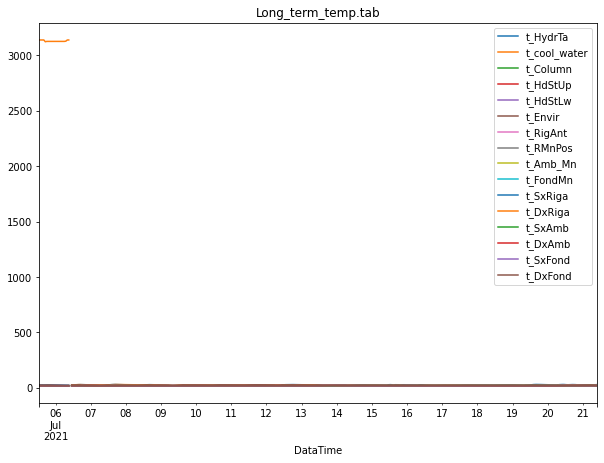

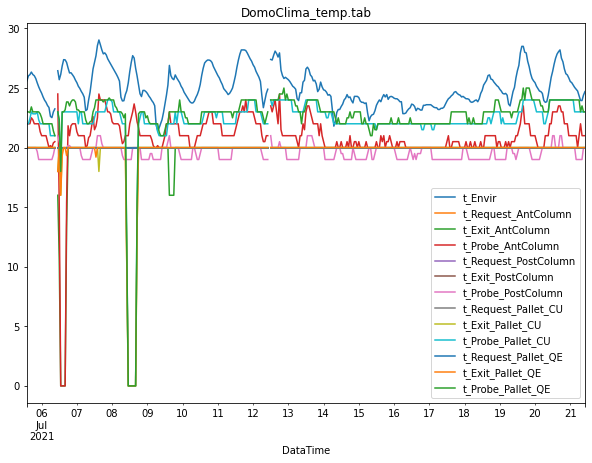

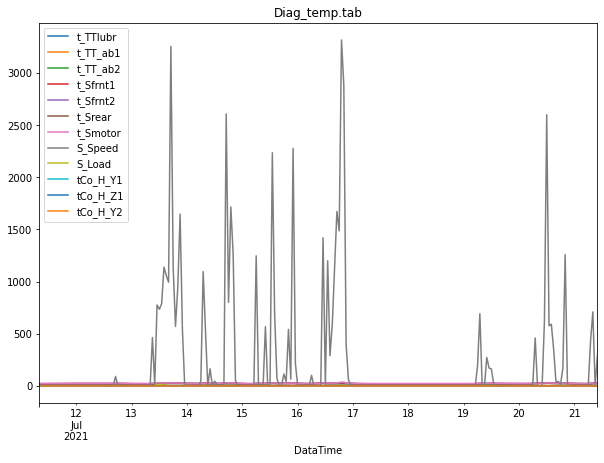

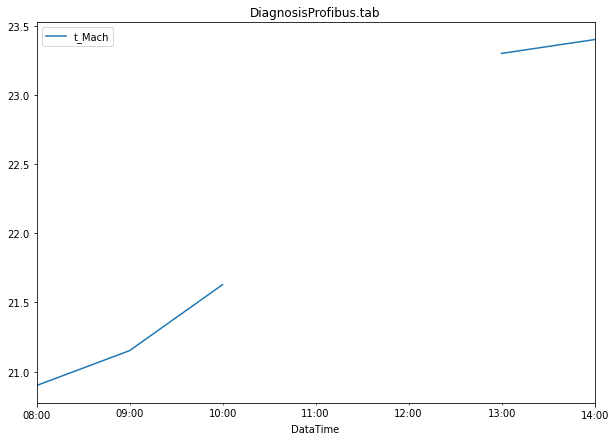

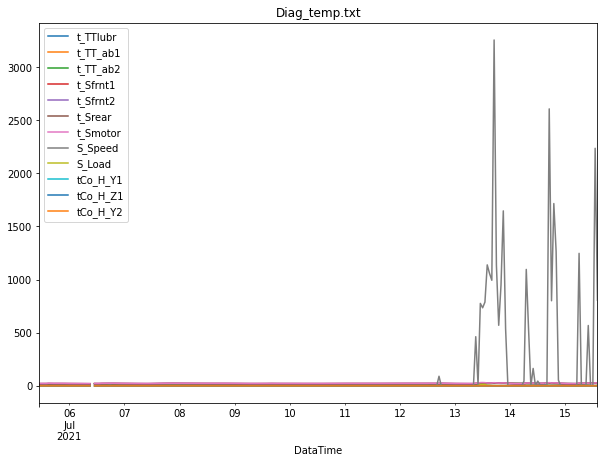

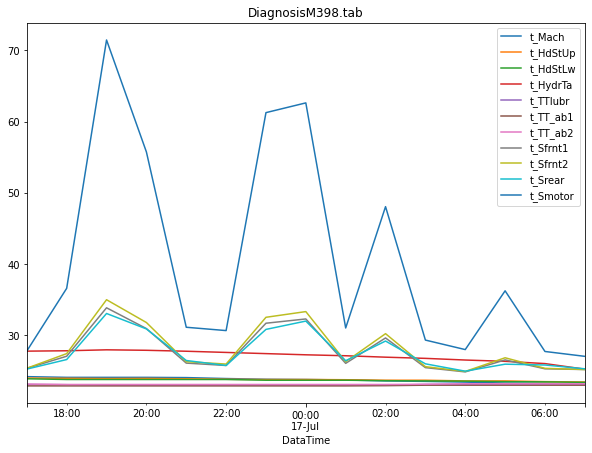

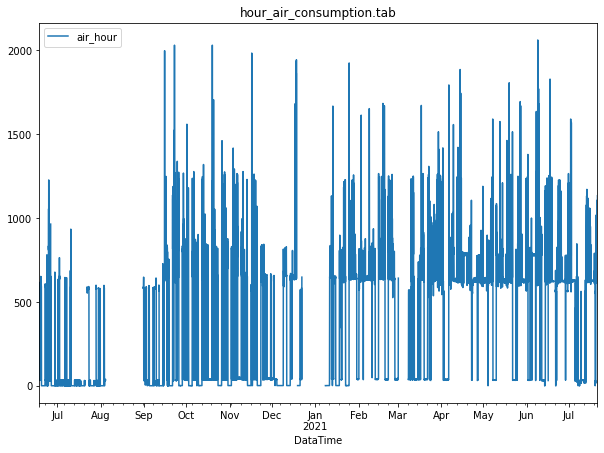

In [31]:
for tab in dataDict:
    df = dataDict[tab].resample('1H').mean()
    df.plot(figsize=(10,7), title=tab)

In [ ]:
df = dataDict['hour_air_consumption.tab']
df = df.reset_index()

df['DataTime'] = df['DataTime'].apply(lambda x: x.replace(second=0))
df = df.drop_duplicates(subset='DataTime', keep='last')
df = df.set_index('DataTime')
df.sort_index(inplace = True)
#df['2021-07-07':].plot(figsize=(15,10))
df = df.resample('1H').mean()
fig = px.line(df, height=800)
fig.show()

In [ ]:
from datetime import date

max_date_allowed=date.today()
print(type(max_date_allowed))
print(max_date_allowed)

#dataDict['Diag_temp.tab'].info()

date_list= pd.DatetimeIndex(dataDict['Diag_temp.tab'].index)
print(date_list[0])

In [ ]:
path = 'table_new2/'
path_dest = path + 'csv/'
dataDict = {}

# se la cartella csv è presente carico i dati in memoria
if os.path.isdir(path_dest):
    for filename in os.listdir(path_dest):
        df = pd.read_csv(path_dest + filename)
        df['DataTime'] = pd.to_datetime(df['DataTime'], format='%Y-%m-%d %H:%M:%S')
        df.set_index('DataTime', drop = True, inplace=True)
        dataDict[filename] = df
    
    for i in dataDict:
        print(i)
else:
    print('Trasformo le tabelle per la visualizzazione, potrebbe richiedere qualche minuto...')
    os.mkdir(path_dest)
    for filename in os.listdir(path):
        if (filename.endswith('.txt') or filename.endswith('.tab')): 
            df = tab_to_df(path + filename)
            if len(df) > 5:
                #df = df.resample('10T').mean()
                df.sort_index(inplace = True)
                dataDict[filename] = df
                df.to_csv(path_dest+filename, index=True)

    for i in dataDict:
        print(i)

## Prove con PyQt5

In [14]:
import sys
from PyQt5.QtCore import *
from PyQt5.QtWebEngineWidgets import *
from PyQt5.QtWidgets import QApplication
from multiprocessing import Process, Queue
import time

def start_window():
    app = QApplication(sys.argv)

    web = QWebEngineView()
    #web.load(QUrl("https://www.google.com"))
    web.load(QUrl("http://127.0.0.1:8051"))
    web.show()

    sys.exit(app.exec())

p = Process(target=start_window, daemon=True)
p.start()
print(str(p.pid))

print(p.exitcode)
while True:
    if not p.is_alive():
        print('ucciso')
        break
print(p.exitcode)

10539
None


KeyboardInterrupt: 